In [1]:
import numpy as np, pandas as pd, matplotlib.pyplot as plt, seaborn as sns
sns.set_context('talk', font_scale=2)
sns.set_style('whitegrid')
%matplotlib inline

# Anti-patterns from GBD

Have you heard of [design anti-patterns before](http://stackoverflow.com/questions/980601/what-is-an-anti-pattern)?

> [Anti-patterns](https://en.wikipedia.org/wiki/Anti-pattern) are certain patterns in software development that is considered a bad programming practice.
> 
> As opposed to [design patterns](https://en.wikipedia.org/wiki/Software_design_pattern) which are common approaches to common problems which have been formalized, and are generally considered a good development practice, anti-patterns are the opposite and are undesirable.



In [2]:
# data to demonstrate the anti-patterns
df = pd.read_csv('data/gbd_2015.csv')

In [3]:
# visual communication anti-pattern 1: a big table with little type

df.groupby(['year', 'cause', 'location']).first().value.unstack().fillna('')

location      China    DRC  Global  India    USA
year cause                                      
1990 Group I  28.52  76.09   46.73  60.43   8.43
     Injury   14.59   6.07   10.63   8.59  11.85
     NCD      56.89  17.84   42.64  30.98  79.72
1995 Group I  21.36  77.20   43.41  55.93   8.89
     Injury   14.82   5.64   10.73   9.34  11.08
     NCD      63.83  17.16   45.86  34.72  80.03
2000 Group I   15.7  76.25   40.79  51.77   7.09
     Injury   13.85   6.08   10.50   9.53  10.61
     NCD      70.45  17.67   48.71  38.69   82.3
2005 Group I  11.25  74.96   37.94  48.34   6.68
     Injury   12.97   5.80   10.31   9.61  10.92
     NCD      75.78  19.24   51.75  42.05   82.4
2010 Group I         71.69   34.21  42.75       
     Injury           6.18   10.45   9.71       
     NCD             22.13   55.34  47.55       
2015 Group I   8.16  65.90   30.12          5.53
     Injury   10.58   7.26   10.14          9.39
     NCD      81.26  26.83   59.74         85.08

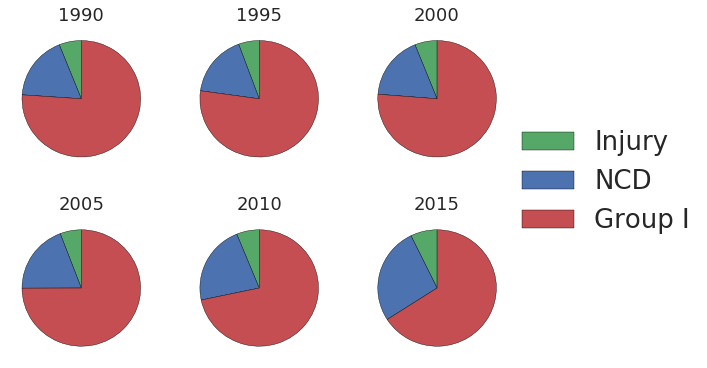

In [4]:
# visual communication anti-pattern 2: bury the lede with bad choice of visual form
plt.figure(figsize=(10, 6))

colors = np.array(sns.color_palette(n_colors=3))
colors = colors[[1,0,2]]

i = 0
for y, dfy in df.query('location == "DRC"').groupby('year'):
    plt.subplot(2, 3, i+1)
    plt.pie(dfy.value[::-1], colors=colors, startangle=90)
    plt.title(str(y), size=18)
    
    i += 1
    
plt.legend(dfy.cause[::-1], loc=(1,.8))
plt.subplots_adjust(hspace=.3, right=.7, left=0)
plt.savefig('img/anti_pie.png')

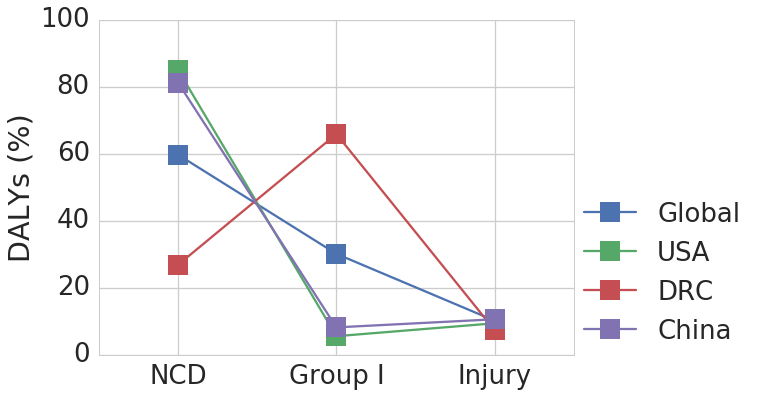

In [5]:
# visual communication anti-pattern 3: misleading visual form
plt.figure(figsize=(12, 6))
plt.subplots_adjust(right=.7, left=.15)

t = df.query('year == 2015').groupby(['cause', 'location']).value.first().unstack()
t = t.loc[['NCD', 'Group I', 'Injury']]
col = 'Global'
plt.plot(t[col].values, marker='s', linestyle='-', ms=20, label=col)
plt.xticks([0,1,2], (t.index))
plt.axis(xmin=-.5, xmax=2.5, ymin=0, ymax=100)
plt.ylabel('DALYs (%)')
plt.legend(loc=(1, 0))
plt.savefig('img/anti_mislead.png')

for col in ['USA', 'DRC', 'China']:
    plt.plot(t[col].values, marker='s', linestyle='-', ms=20, label=col)
plt.axis(xmin=-.5, xmax=2.5, ymin=0, ymax=100)
plt.legend(loc=(1, 0))
plt.savefig('img/anti-anti_mislead.png')


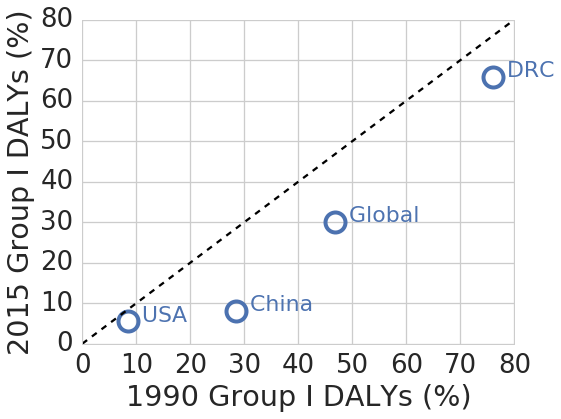

In [6]:
# visual communication anti-pattern 4: another misleading visual form

plt.figure(figsize=(8, 6))
plt.subplots_adjust(left=.15, bottom=.15)

t = df
t = t[t.year.isin([1990, 2015])]
t = t[t.cause == "Group I"]
t = t.groupby(['location', 'year']).value.first()
t = t.unstack()

color = tuple(colors[1])

for row in ['Global', 'USA', 'DRC', 'China']:
    plt.plot(t.loc[row, 1990], t.loc[row, 2015], 'o', ms=20, mec=color, mew=4, color='none')
    plt.text(t.loc[row, 1990], t.loc[row, 2015], '  '+row, ha='left', va='baseline', size=22, color=color)
             
plt.plot([0,80], [0,80], 'k--', )
plt.xlabel('1990 Group I DALYs (%)')
plt.ylabel('2015 Group I DALYs (%)')
plt.savefig('img/anti-scatter.png')
